In [45]:
# General analysis/plotting packages:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from collections import Counter

# Specific t-SNE/visualization packages:
from shapely.geometry import Point, Polygon

# Import UMAP
import umap.umap_ as umap

# Try using SKLEARN's StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler

#t-SNE
from sklearn.manifold import TSNE
from shapely.geometry import Point, Polygon

In [2]:
data = pd.read_csv('APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

In [11]:
# Spatial:
ra = data["RA"]   #APOGEE
dec = data["DEC"]   #APOGEE

# Identification:
apogee_ID = data["# APOGEE_ID_"]   #APOGEE
gaia_ID = data["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = data["GAIAEDR3_PARALLAX"]  # Gaia
pmra = data["GAIAEDR3_PMRA"]  # Gaia
pmra_err = data["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = data["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = data["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = data["VHELIO_AVG"]   #APOGEE
RV_err = data["VERR"]   #APOGEE
#dist = data["dist"]   #APOGEE no dist in this dataset?
#dist_err = data["dist_err"]   #APOGEE
jr = data["jr"]   #APOGEE
jr_err = data["jr_err"]   #APOGEE
jz = data["jz"]   #APOGEE
jz_err = data["jz_err"]   #APOGEE
#jphi = data["jphi"]   #APOGEE no jphi in this dataset?
#jphi_err = data["jphi_err"]    #APOGEE

# # Spectral (useful for filtering):
TEFF_ERR = data["TEFF_ERR"]   #APOGEE
TEFF = data["TEFF"]   #APOGEE
LOGG_ERR = data["LOGG_ERR"]   #APOGEE
LOGG = data["LOGG"]   #APOGEE
SNR = data["SNR"]   #APOGEE
ASPCAPFLAG = data["ASPCAPFLAG"]
STARFLAG = data["STARFLAG"]

# # Chemical abundances from astroNN:
FE_H = data['FE_H'] 
C_FE = data['C_FE']
CI_FE = data['CI_FE']
N_FE = data['N_FE']
O_FE = data['O_FE']
MG_FE = data['MG_FE']
AL_FE = data['AL_FE']
SI_FE = data['SI_FE']
P_FE = data['P_FE']
S_FE = data['S_FE']
K_FE = data['K_FE']
CA_FE = data['CA_FE']
TI_FE = data['TI_FE']
TIII_FE = data['TIII_FE']
V_FE = data['V_FE']
CR_FE = data['CR_FE']
MN_FE = data['MN_FE']
CO_FE = data['CO_FE']
NI_FE = data['NI_FE']

# # Chemical abundance errors from astroNN:
FE_H_err = data["FE_H_ERR"] 
C_FE_err = data['C_FE_ERR']
CI_FE_err = data['CI_FE_ERR']
N_FE_err = data['N_FE_ERR']
O_FE_err = data['O_FE_ERR']
MG_FE_err = data['MG_FE_ERR']
AL_FE_err = data['AL_FE_ERR']
SI_FE_err = data['SI_FE_ERR']
P_FE_err = data['P_FE_ERR']
S_FE_err = data['S_FE_ERR']
K_FE_err = data['K_FE_ERR']
CA_FE_err = data['CA_FE_ERR']
TI_FE_err = data['TI_FE_ERR']
TIII_FE_err = data['TIII_FE_ERR']
V_FE_err = data['V_FE_ERR']
CR_FE_err = data['CR_FE_ERR']
MN_FE_err = data['MN_FE_ERR']
CO_FE_err = data['CO_FE_ERR']
NI_FE_err = data['NI_FE_ERR']

# # Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, #dist, dist_err,
         jr, jr_err,# jphi, jphi_err,
        jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, ASPCAPFLAG, STARFLAG, FE_H, FE_H_err, C_FE, 
         C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
         SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
         TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


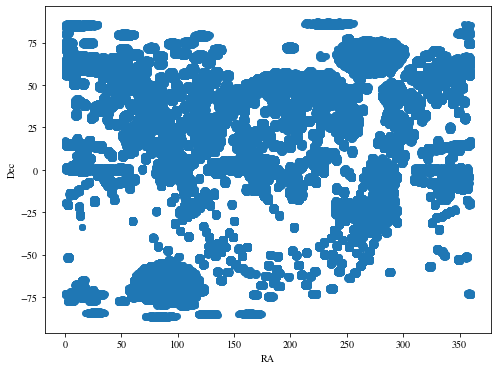

In [5]:
#Plotting RA and Dec

plt.figure(figsize = (8, 6))
plt.scatter(cols[0], cols[1])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [6]:
# #Proper motions

# plt.figure(figsize = (8, 6))
# plt.scatter(data_snrfilter[5], data_snrfilter[7])
# plt.xlabel('pmRA')
# plt.ylabel('pmDec')
# plt.show()

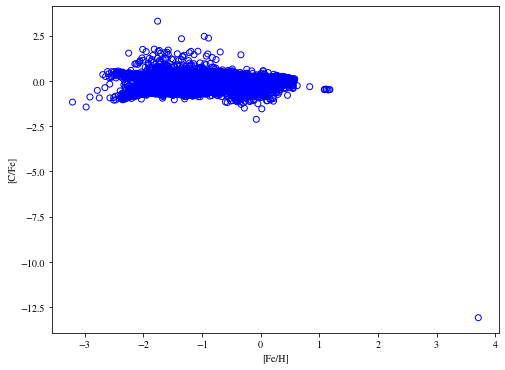

In [33]:
#Looking at chemical abundances

plt.figure(figsize = (8, 6))
plt.scatter(data_snrfilter[20], data_snrfilter[22],facecolors='none', edgecolors='b')
plt.xlabel('[Fe/H]')
plt.ylabel('[C/Fe]')
plt.show()

## Filter out stars which have ASPCAPFLAG or STARFLAG > 0

In [26]:
aspcapflags_filter = np.array(cols[20])==0
starflags_filter = np.array(cols[21])==0

filters = aspcapflags_filter*starflags_filter


filtered_data = []
for c in cols:
    a = np.array(c)[filters]
    filtered_data.append(a)

In [30]:
print("There are {} stars in our filtered sample".format(len(filtered_data[0])))

There are 144767 stars in our filtered sample


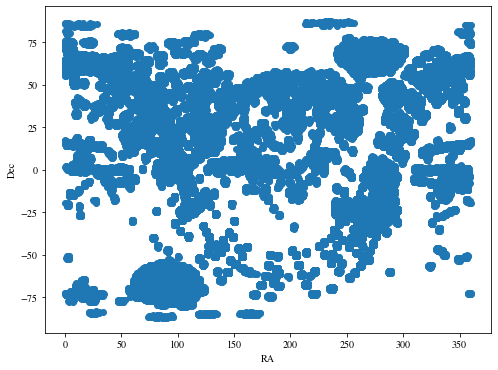

In [33]:
#Plotting RA and DEC of filtered data

plt.figure(figsize = (8, 6))
plt.scatter(filtered_data[0], filtered_data[1])
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

## Prep data to run UMAP on it
Note: I am NOT including RVs in this run

In [35]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = filtered_data[22], filtered_data[24], filtered_data[26]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = filtered_data[28], filtered_data[30], filtered_data[32]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = filtered_data[34], filtered_data[36], filtered_data[38]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = filtered_data[40], filtered_data[42], filtered_data[44]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = filtered_data[46], filtered_data[48], filtered_data[50]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = filtered_data[52], filtered_data[54], filtered_data[56], filtered_data[58]
RV_filtered  = filtered_data[9]

preumap_array = np.array([FE_H_filtered, C_FE_filtered, CI_FE_filtered, N_FE_filtered, O_FE_filtered, MG_FE_filtered,
                      AL_FE_filtered, SI_FE_filtered, P_FE_filtered, S_FE_filtered, K_FE_filtered, CA_FE_filtered, 
                      TI_FE_filtered, TIII_FE_filtered, V_FE_filtered, CR_FE_filtered, MN_FE_filtered, CO_FE_filtered,
                       NI_FE_filtered])

standardized_array = StandardScaler().fit_transform(preumap_array)


In [36]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(standardized_array)

In [38]:
# Transpose the standardized + filtered array:
standardized_array_transpose = np.transpose(standardized_array)

# Run t-SNE on the transposed array:
reducer = umap.UMAP()
embedding = reducer.fit_transform(standardized_array_transpose)

# Get t-SNE outputs for complete filtered dataset:
umap_dimX = embedding[:, 0]
umap_dimY = embedding[:, 1]

# Get t-SNE outputs for control group:
#umap_dimX_control = umap_dimX[indices_control]
#umap_dimY_control = umap_dimY[indices_control]

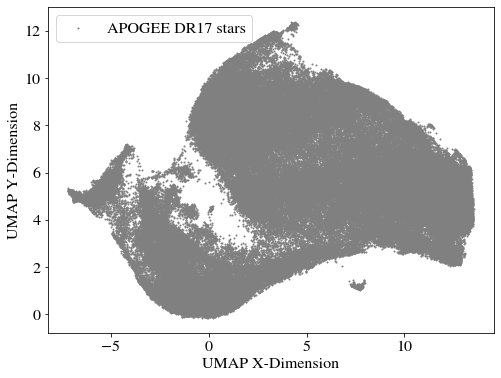

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(umap_dimX, umap_dimY, s=1, c='gray', label='APOGEE DR17 stars')
ax.set_xlabel("UMAP X-Dimension", fontsize=16)
ax.set_ylabel("UMAP Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16)
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

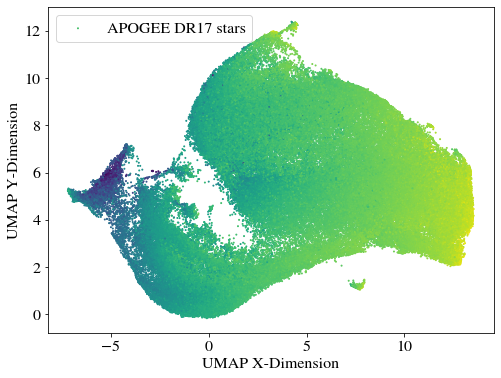

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(umap_dimX, umap_dimY, s=1, c=filtered_data[22], label='APOGEE DR17 stars') #with c = FE_H
ax.set_xlabel("UMAP X-Dimension", fontsize=16)
ax.set_ylabel("UMAP Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16)
plt.colorbar()
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

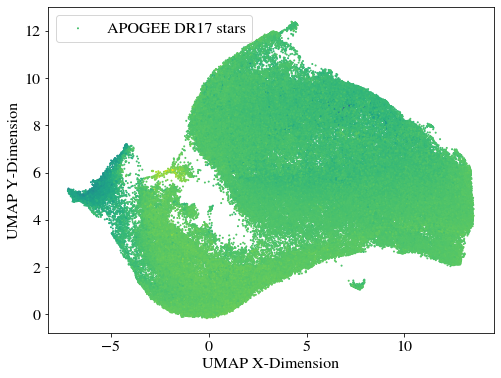

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(umap_dimX, umap_dimY, s=1, c=filtered_data[24], label='APOGEE DR17 stars') #with c = C_FE
ax.set_xlabel("UMAP X-Dimension", fontsize=16)
ax.set_ylabel("UMAP Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16)
plt.colorbar()
plt.show()

## Preparing t-SNE run

In [43]:
pretsne_array = np.array([FE_H_filtered, C_FE_filtered, CI_FE_filtered, N_FE_filtered, O_FE_filtered, MG_FE_filtered,
                      AL_FE_filtered, SI_FE_filtered, P_FE_filtered, S_FE_filtered, K_FE_filtered, CA_FE_filtered, 
                      TI_FE_filtered, TIII_FE_filtered, V_FE_filtered, CR_FE_filtered, MN_FE_filtered, CO_FE_filtered,
                       NI_FE_filtered])


tsne_standardized_array = []
for i in pretsne_array:
    mean, sigma = np.mean(i), np.std(i)
    norm = (i - mean) / sigma
    tsne_standardized_array.append(norm)

In [47]:
# Transpose the standardized + filtered array:
tsne_standardized_array_transpose = np.transpose(tsne_standardized_array)

# Run t-SNE on the transposed array:
tsne_init = TSNE(n_components=2)
tsne_2d = tsne_init.fit_transform(tsne_standardized_array_transpose)

# Get t-SNE outputs for complete filtered dataset:
t_SNE_dimX = tsne_2d[:, 0]
t_SNE_dimY = tsne_2d[:, 1]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


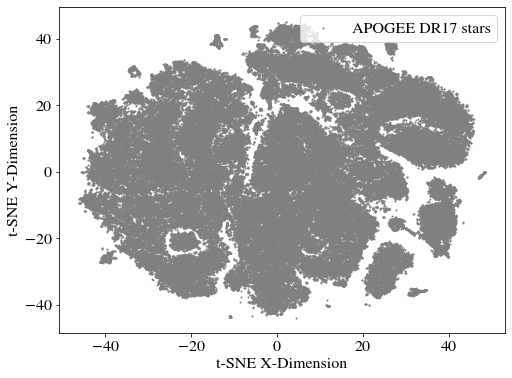

In [53]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(t_SNE_dimX, t_SNE_dimY, s=1, c='gray', label='APOGEE DR17 stars')
ax.set_xlabel("t-SNE X-Dimension", fontsize=16)
ax.set_ylabel("t-SNE Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16, loc=1)
plt.show()

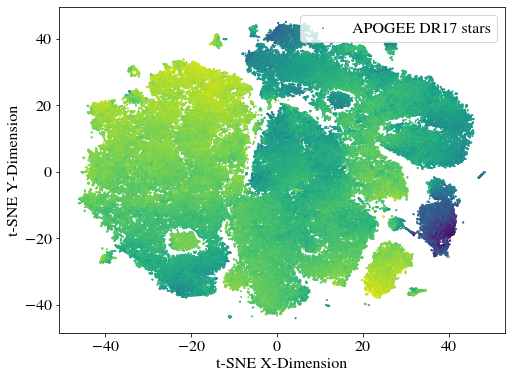

In [54]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(t_SNE_dimX, t_SNE_dimY, s=1, c=filtered_data[22], label='APOGEE DR17 stars') #with c = FE_H
ax.set_xlabel("t-SNE X-Dimension", fontsize=16)
ax.set_ylabel("t-SNE Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16, loc=1)
plt.show()

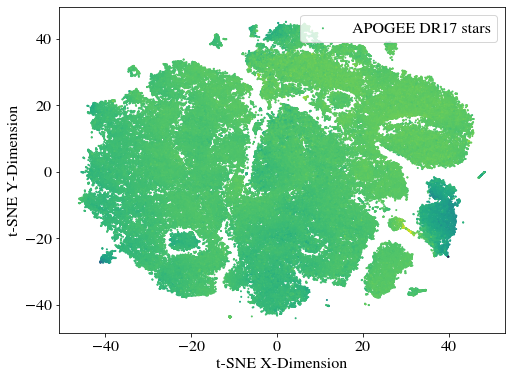

In [55]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(t_SNE_dimX, t_SNE_dimY, s=1, c=filtered_data[24], label='APOGEE DR17 stars') #with c = C_FE
ax.set_xlabel("t-SNE X-Dimension", fontsize=16)
ax.set_ylabel("t-SNE Y-Dimension", fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.tick_params(axis='both', which='minor', labelsize=16)
ax.legend(fontsize=16, loc=1)
plt.show()